<a href="https://colab.research.google.com/github/JPFphysics/15c-lab/blob/master/15c_ruler_diffraction_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Diffraciton from a ruler
This is a picture of the experimental setup:

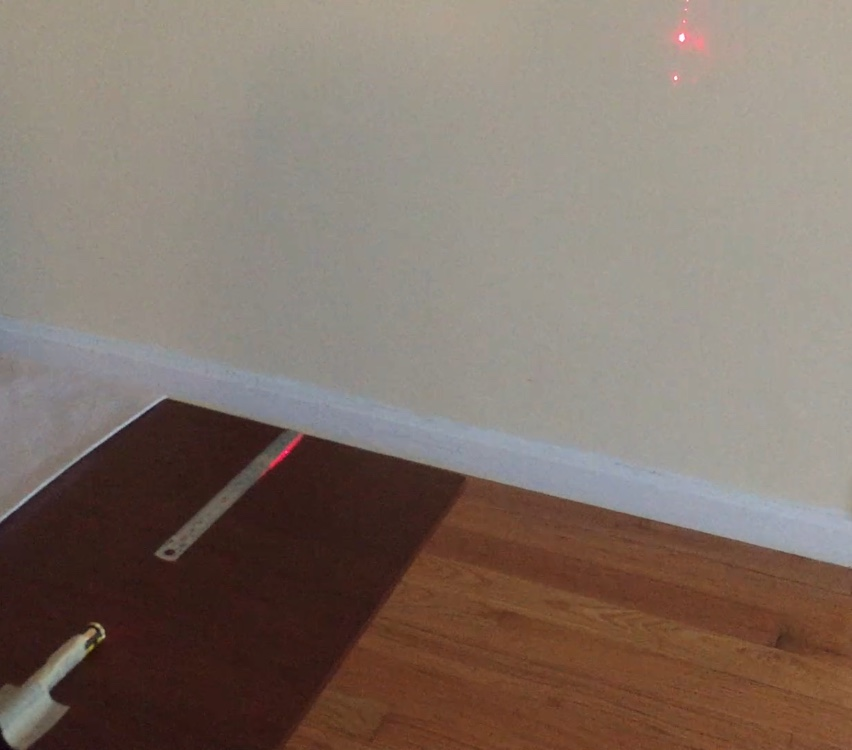

and the schematic:


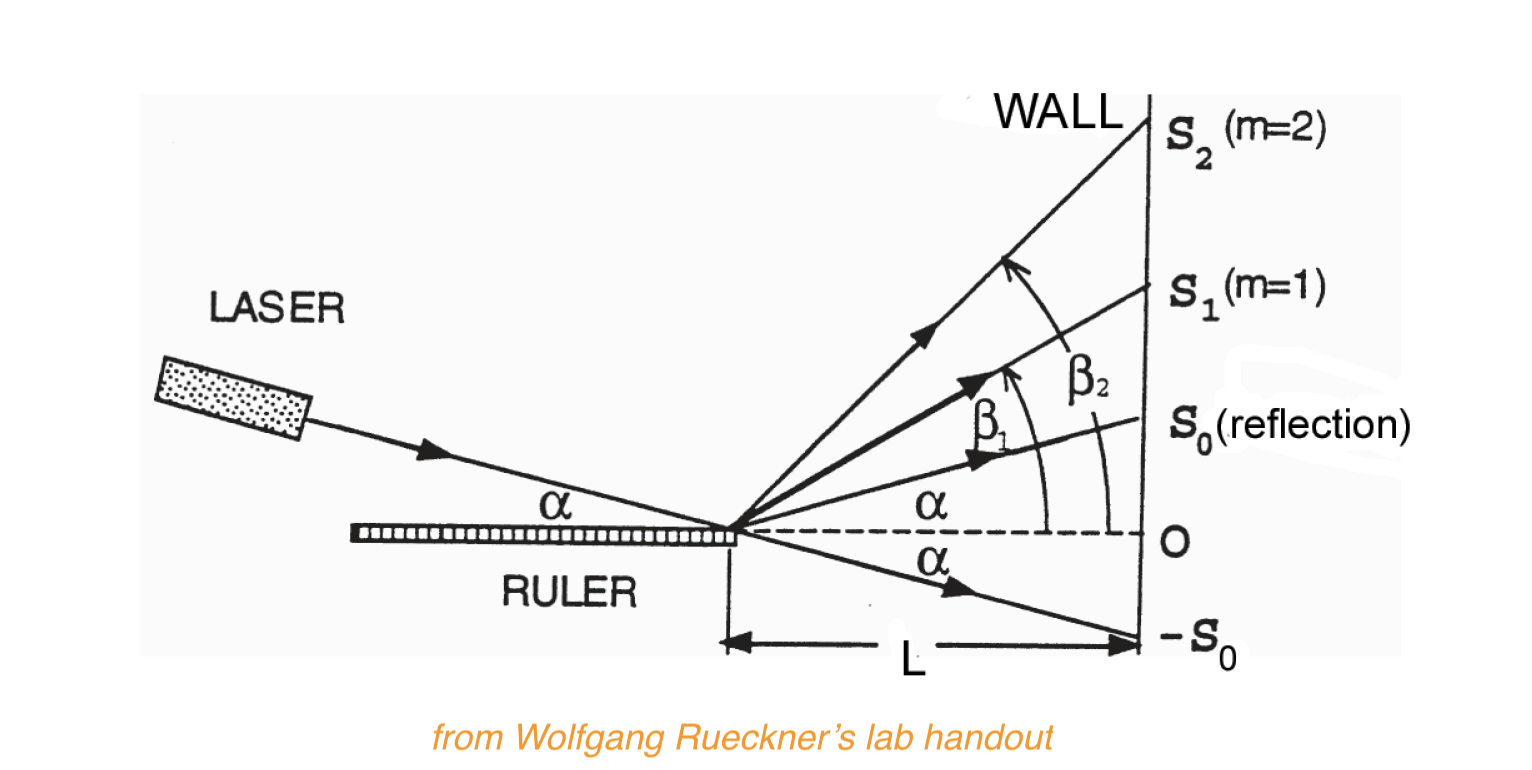

wavelength of the laser: lamda = [664.76747293]  +/-  [[1.41118316]] nm
chi_squared of the curve fit =   3.9819954412595435
reduced_chi_squared of the curve fit =   0.49774943015744294


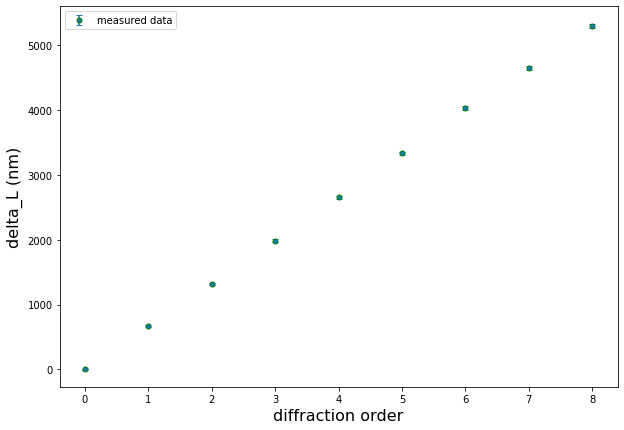

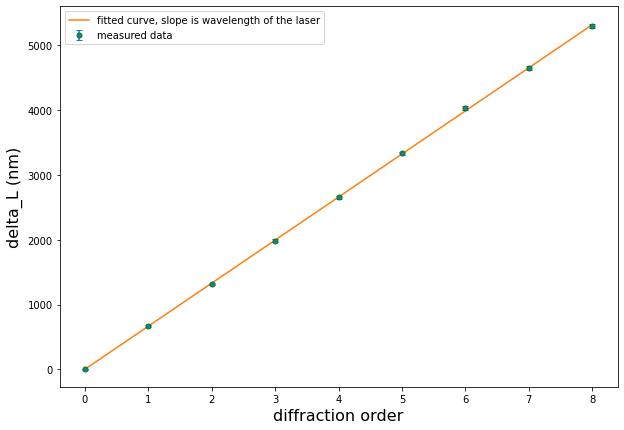

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#################################################################
#                                                               #
# You need to measure the following values of your own setup    #
# and put in the code:                                          #
#                                                               #
# d_in_mm, z, err_z, doubleS0, err_doubleS0,                    #
# diffraction_postion, err_diffraction_postion                  #
#                                                               #
# See the description of these values below.                    #
#                                                               #
#################################################################



######################################
# Input your own d_in_mm here:       #
#                                    #
######################################
d_in_mm = 0.5     #ruler spacing in mm


#######################################
# Input your own z and err_z here:    #
#                                     #
#######################################
z = 117   #horizontal distance between the edge of table and the wall, in cm
err_z = 0.3   #meaurement error of z, in cm


###################################################
# Input your own doubleS0 and err_doubleS0 here:  #
#                                                 #
###################################################
doubleS0 = 5.15   #distance between directly light spot and the zero order diffraction (reflection) spot on the wall, in cm
err_doubleS0 = 0.05  #meaurement error of doubleS0, in cm


#########################################################################
# Input your own diffraction_postion and err_diffraction_postion here:  #
#                                                                       #
#########################################################################
diffraction_postion = np.array([0, 4, 6.3, 8.2, 9.8, 11.25, 12.6, 13.7, 14.8]) #distance between diffraction spots and zero order diffraction(reflection) on the wall, in cm
err_diffraction_postion  = np.array([0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]) #meaurement error of diffraction_postion, in cm 






##########################################
#                                        #
# Don't need to change the lines below   #
#                                        #
##########################################              

#convert ruler spacing in nm
d = d_in_mm * 1e6;    #convert ruler spacing in nm

# to find out the incident angle alpha:
y1 = doubleS0/2      #in cm
err_y1 = err_doubleS0/2   #propagated error of y1, in cm 

y1_div_z = y1/z    #y1/z is the tangent of incident angle
err_y1_div_z = y1_div_z * np.sqrt((err_y1/y1)**2 + (err_z/z)**2)   #propagated error of y1/z

angle_alpha = np.arctan(y1_div_z)   #incident angle alpha, in radian
err_angle_alpha = err_y1_div_z / (1 + y1_div_z)**2   #propagated error of alpha

cos_alpha = np.cos(angle_alpha)
err_cos_alpha = np.sin(angle_alpha) * err_angle_alpha


# to find the diffraction angles:

y2 = doubleS0/2 + diffraction_postion #distance between diffraction spots and the tabel level on the wall, in cm                
err_y2 = np.sqrt((err_doubleS0/2)**2 + err_diffraction_postion**2) #propagated error of y2, in cm 

y2_div_z = y2/z  #y2/z is the tangent of diffraction angles
err_y2_div_z = y2_div_z * np.sqrt((err_y2/y2)**2 + (err_z/z)**2) #propagated error of y2/z


angle_beta = np.arctan(y2_div_z)   #the diffraction angles beta, in radian
err_angle_beta = err_y2_div_z / (1 + y2_div_z)**2   #propagated error of beta

cos_beta = np.cos(angle_beta)
err_cos_beta = np.sin(angle_beta) * err_angle_beta



difference_cos = cos_alpha - cos_beta  # cos(alpha)- cos(beta)
err_difference_cos = np.sqrt(err_cos_alpha**2 + err_cos_beta**2) # propagated error of (cos(alpha)- cos(beta))


# Optical path lengths difference between all measured diffractions and zero order diffraction:
delta_L = d * difference_cos #in nm 
err_delta_L = d * err_difference_cos #propagated error of delta_L, in nm 


m = np.linspace(0,np.size(y2)-1,np.size(y2)) #array for diffraction orders


# delta_L = m* lambda , lamda is the wavelength of laser, a constant; m is diffraction order
# delta_L vs. m should be a line through origin, with wavelength as the slope.

# plot the data (delta_L vs. m)
plt.figure(figsize=[10,7])
plt.errorbar(m,delta_L,err_delta_L,fmt='o',ms=5, mec='g',capsize=3, label = 'measured data')
plt.xlabel('diffraction order',fontsize=16)
plt.ylabel('delta_L (nm)',fontsize=16) 
plt.legend()


# Do Chi-squared analysis:

# define functions to calculate the reduced Chi square
def ChiSquareReduced(y,yfit,error,v):
    '''this function calculate reduced Chi Square of v parameter fit'''
    ChiSquareReducedValue = np.sum((y-yfit)**2/error**2)/(len(y)-v)
    return ChiSquareReducedValue
# define functions to calculate the Chi square
def ChiSquare(y,yfit,error):
    '''this function calculate Chi Square'''
    ChiSquareValue = np.sum((y-yfit)**2/error**2)
    return ChiSquareValue

# define a one parameter line 
def func(x, a):
    return a * x

# Find the best fit using scipy.optimize (curve_fit)
popt, pcov = curve_fit(func, m, delta_L, sigma=err_delta_L ) # popt: Optimal values for the parameters, pcov: the estimated covariance of popt

# Print the best fit parameters
print ('wavelength of the laser: lamda =', popt, ' +/- ', np.sqrt(pcov), 'nm')


delta_L_fit = popt*m  #delta_L calculated from curve fit

chi_squared = ChiSquare(delta_L, delta_L_fit, err_delta_L)  #chi squared value of the curve fit
reduced_chi_squared = ChiSquareReduced(delta_L, delta_L_fit, err_delta_L,1)

print('chi_squared of the curve fit =  ', chi_squared)
print('reduced_chi_squared of the curve fit =  ', reduced_chi_squared)

# plot the measured data and curve fit together
plt.figure(figsize=[10,7])
plt.errorbar(m, delta_L,err_delta_L,fmt='o',ms=5, mec='g',capsize=3, label = 'measured data')
plt.plot(m,delta_L_fit, label = 'fitted curve, slope is wavelength of the laser')
plt.xlabel('diffraction order',fontsize=16)
plt.ylabel('delta_L (nm)',fontsize=16) 
plt.legend()
